In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\\Users\\P.Siddartha\\Documents\\NareshIT\\datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [3]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- There are total 25480 applicants

- In that 25480 applicants 17018 applicants got the visa

- 8462 applicants did not get visa

- also there are 16861 applicants are applicants from aso got certified

- we need to know how many applicants got certified

- andhow many applicants from asia got denied 

In [7]:
#step-1: select continent data
#step-2; continent data=='Asia' it is con1
#step-3: select the case status data
#step-4: case status data == 'certified' is con2
#step-5: con=con1&con2
#step-6: apply main df on con get the len

In [8]:

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])

11012

In [9]:
visa_df['continent']
con1 = visa_df['continent']=='Asia'
visa_df['case_status']
con2 = visa_df['case_status']=='Certified'
con = con1 & con2
len(visa_df[con])

11012

In [10]:
labels=visa_df['continent'].unique()
for i in labels:
  con1 = visa_df['continent']==i
  con2 = visa_df['case_status']=='Certified'
  con = con1 & con2
  print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [11]:
labels=visa_df['continent'].unique()
cer_c=[]
den_c=[]
for i in labels:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    certi_con=con1&con2
    deni_con=con1&con3
    cer_c.append(len(visa_df[certi_con]))
    den_c.append(len(visa_df[deni_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(cer_c,den_c),columns=cols,index=labels)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

In [12]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)


<Axes: xlabel='continent'>

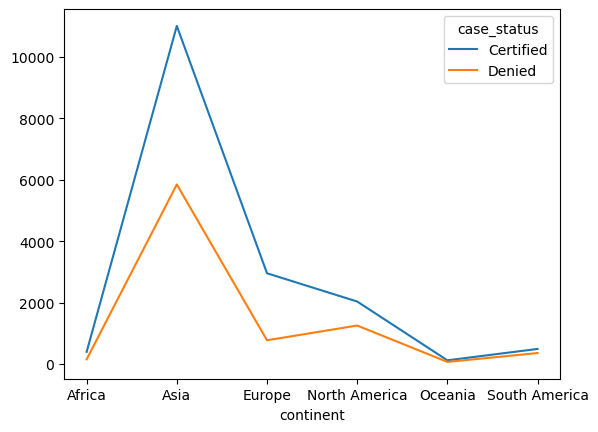

In [13]:
r1.plot()

<Axes: xlabel='continent'>

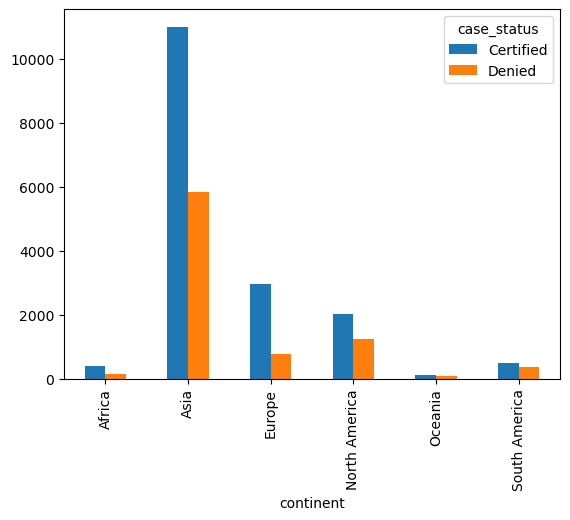

In [14]:
r1.plot(kind='bar')

**case status_continent-education_of_employee**

In [15]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
r2=pd.crosstab(col1,[col2,col3])
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [16]:
cols=[col2,col3]
pd.crosstab(cols,col1)

continent                          Africa  Asia  Europe  North America  \
case_status education_of_employee                                        
Certified   Bachelor's                 81  4407    1040            641   
            Doctorate                  43   780     788            207   
            High School                23   676     162            210   
            Master's                  250  5149     967            979   
Denied      Bachelor's                 62  2761     259            584   
            Doctorate                  11   143      58             51   
            High School                43  1614     328            191   
            Master's                   38  1331     130            429   

continent                          Oceania  South America  
case_status education_of_employee                          
Certified   Bachelor's                  38            160  
            Doctorate                   19             75  
            High School                 19             74  
            Master's                    46            184  
Denied      Bachelor's                  28            173  
            Doctorate                    3             14  
            High School                 17             63  
            Master's                    22            109

<Axes: xlabel='continent'>

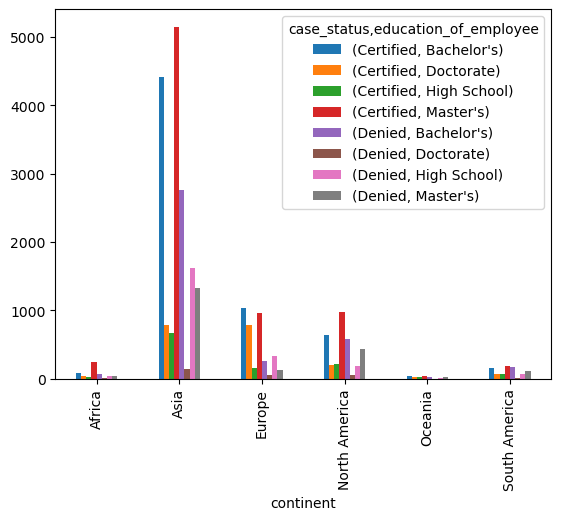

In [17]:
r2.plot(kind='bar')

<Axes: xlabel='continent'>

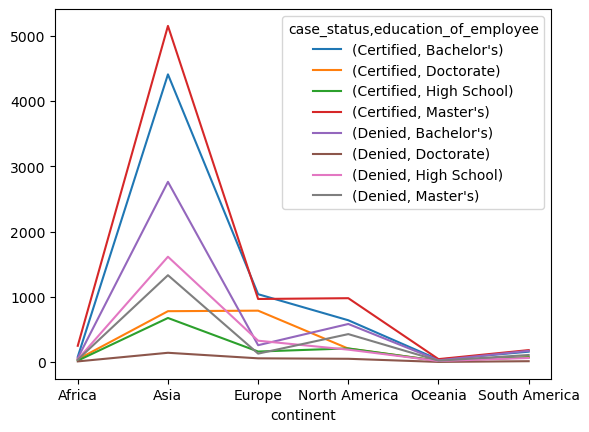

In [18]:
r2.plot()

**group by**

In [19]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [20]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [21]:
l=list(visa_df.groupby('education_of_employee'))

In [22]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [23]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [24]:
visa_df.groupby('education_of_employee')['prevailing_wage']

In [25]:
visa_df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [26]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [27]:
visa_df[visa_df['education_of_employee']=="Doctorate"]['prevailing_wage'].mean()

np.float64(64561.07665734489)

In [28]:
visa_df[visa_df['education_of_employee']=="High School"]['prevailing_wage'].mean()

np.float64(71582.14775570175)

In [29]:
visa_df[visa_df['education_of_employee']=="Master's"]['prevailing_wage'].mean()

np.float64(78843.05784308698)

In [30]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [31]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [32]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [33]:
visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [34]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- we have seen **continent and case status**

- we have seen three variable **continent, case ststus and Education of employee**

- we also done similar analysis using groupby

- only categorical column analysis completed

- also BI variate and multivariante analysis also completed

- now we need to performt two columns which are numerical in nature

   - This will give relation b/w two cokumns which are numerical in  ature
 
   - so we can perform **correlation matrix to get the relationship
 
   - also we need to perform **scatter plots to visualize the relation

**plt.scatter**

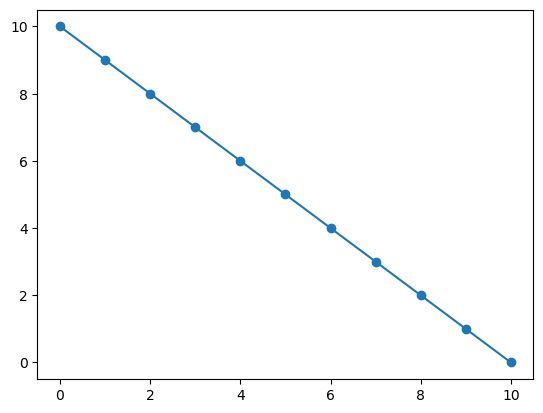

In [36]:
x=range(0,11)
y=range(10,-1,-1)
plt.scatter(x,y)
plt.plot(x,y)

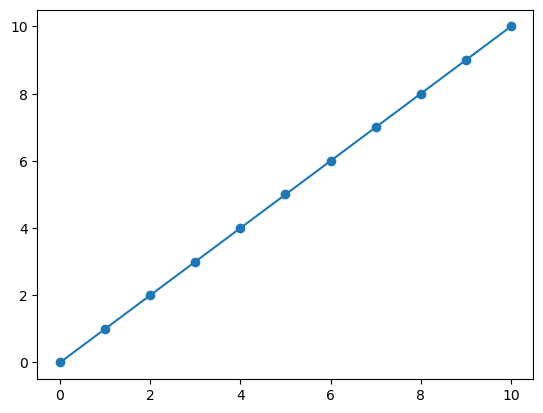

In [38]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

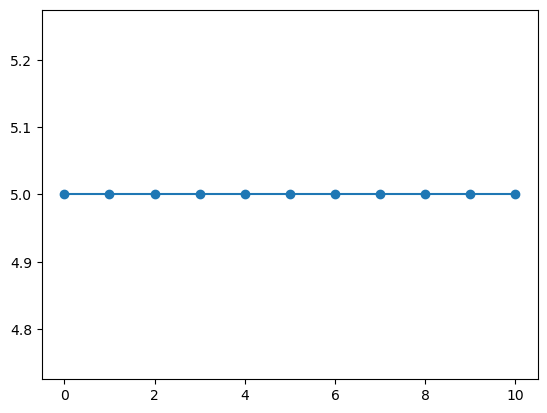

In [39]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [40]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [41]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [42]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


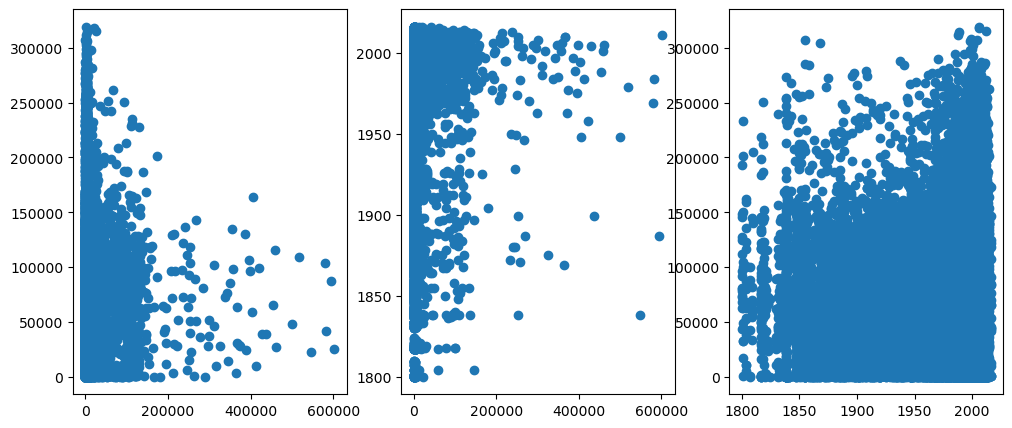

In [48]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,5))
plt.subplot(1,3,1).scatter(col1,col3)
plt.subplot(1,3,2).scatter(col1,col2)
plt.subplot(1,3,3).scatter(col2,col3)

In [50]:
file_path=r"C:\\Users\\P.Siddartha\\Documents\\NareshIT\\datafiles\\winequality.csv"
winequality_df=pd.read_csv(file_path)


In [54]:
wine_cor=winequality_df.corr(numeric_only=True)

**heat map**

- Any matrix values we can visualize using a heat map

- Heat map will provide colors for different values

- Heat map also provides colors bar which indicates, the color and its values

- For example the values ranges from 0.8 to 1disply as **blue color**

- so we need to check values, we can directly see the blue color

- so immediately we can sense blue color means highest values which is 0.8 to 1

- heat map available in **seaborn**

<Axes: >

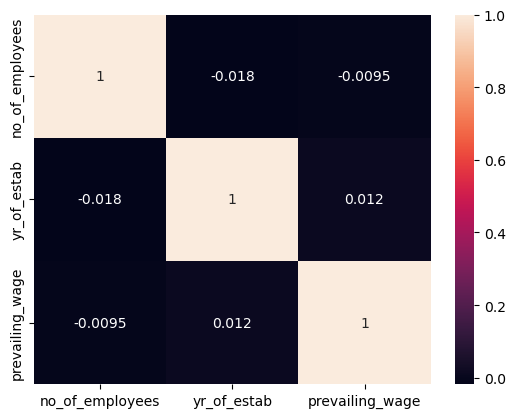

In [53]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

<Axes: >

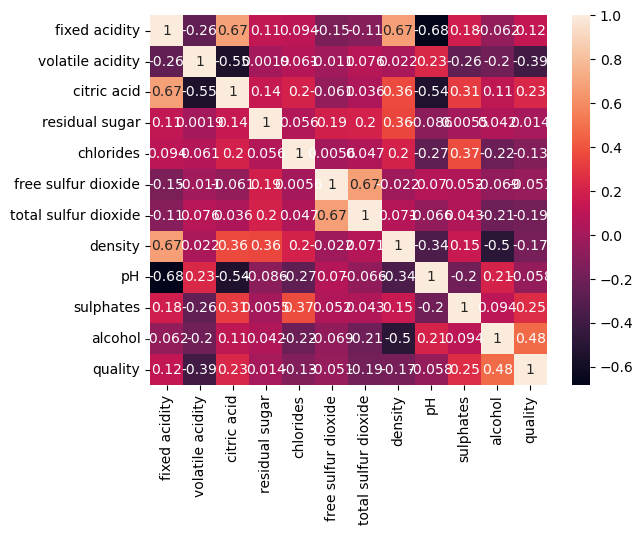

In [56]:
wine_cor=winequality_df.corr()
sns.heatmap(wine_cor,annot=True)

In [58]:
winequality_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

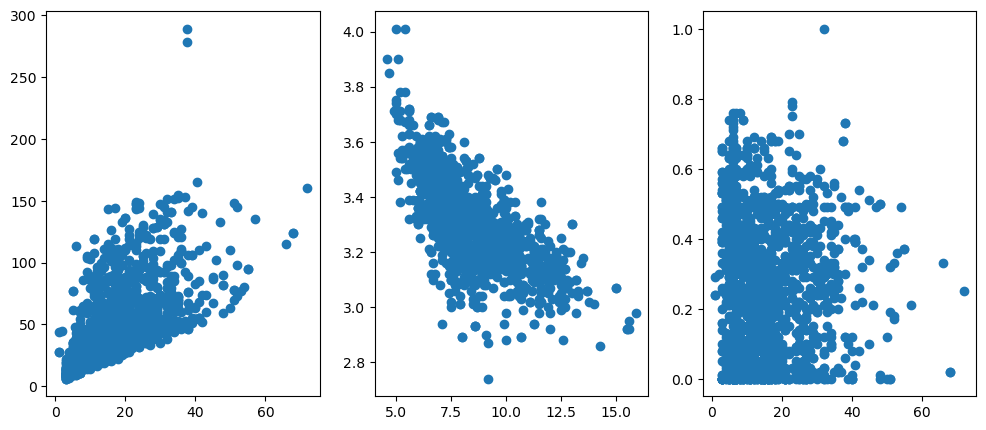

In [61]:
col1=winequality_df['free sulfur dioxide']
col2=winequality_df['total sulfur dioxide']
col3=winequality_df['fixed acidity']
col4=winequality_df['pH']
col5=winequality_df['citric acid']
plt.figure(figsize=(12,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)